In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("C:\\Users\\Preston\\OneDrive\\Desktop\\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.shape

(10683, 11)

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.drop(["Additional_Info",],axis=1,inplace=True)

In [6]:
df.drop(["Total_Stops"],axis=1,inplace=True)

In [7]:
df.shape

(10683, 9)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Price              0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Price              0
dtype: int64

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Price               int64
dtype: object

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [13]:
oe=OrdinalEncoder()
ohe=OneHotEncoder()

In [14]:
ct=make_column_transformer(
       (ohe,['Airline','Source','Destination']),   
         remainder='passthrough')

In [15]:
ct.fit_transform(df)

array([[0.0, 0.0, 0.0, ..., '01:10 22 Mar', '2h 50m', 3897],
       [0.0, 1.0, 0.0, ..., '13:15', '7h 25m', 7662],
       [0.0, 0.0, 0.0, ..., '04:25 10 Jun', '19h', 13882],
       ...,
       [0.0, 0.0, 0.0, ..., '11:20', '3h', 7229],
       [0.0, 0.0, 0.0, ..., '14:10', '2h 40m', 12648],
       [0.0, 1.0, 0.0, ..., '19:15', '8h 20m', 11753]], dtype=object)

In [16]:
df1=oe.fit_transform(df[['Date_of_Journey','Arrival_Time','Dep_Time','Duration']])
df1

array([[  24.,  233.,  211.,  240.],
       [   6.,  906.,   31.,  336.],
       [  43.,  413.,   70.,  106.],
       ...,
       [  29.,  824.,   58.,  280.],
       [   0.,  938.,   92.,  238.],
       [  42., 1124.,   85.,  347.]])

In [17]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df.dtypes

Airline            float64
Date_of_Journey    float64
Source             float64
Destination        float64
Route              float64
Dep_Time           float64
Arrival_Time       float64
Duration           float64
Price                int64
dtype: object

In [19]:
df.skew().sort_values()

Arrival_Time      -0.606676
Route             -0.501911
Source            -0.424023
Duration          -0.213498
Date_of_Journey   -0.070718
Dep_Time           0.194914
Airline            0.731057
Destination        1.244046
Price              1.812405
dtype: float64

In [20]:
df["Price"] = df["Price"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['Price'].skew())

-0.25476338907926027


<AxesSubplot:xlabel='Price', ylabel='Density'>

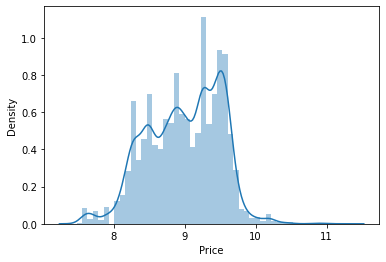

In [21]:
import seaborn as sns
sns.distplot(df['Price'],kde=True)

In [22]:
x=df.drop('Price',axis=1)
y=df['Price']

In [23]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [24]:
x_scaled

array([[-0.41080484,  0.02158081, -1.65835945, ...,  1.68644749,
        -1.92108144,  0.42282971],
       [-1.26115217, -1.43744594,  0.89001433, ..., -1.26028164,
         0.10905876,  1.3066437 ],
       [ 0.01436882,  1.5616646 ,  0.04055641, ..., -0.62182366,
        -1.3781019 , -0.81082732],
       ...,
       [ 0.01436882,  0.42686602, -1.65835945, ..., -0.81827227,
        -0.13829859,  0.79108554],
       [ 2.56541078, -1.92378819, -1.65835945, ..., -0.26166788,
         0.20558845,  0.40441692],
       [-1.26115217,  1.48060756,  0.04055641, ..., -0.3762629 ,
         0.76666732,  1.40791406]])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LE=LinearRegression()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=100)
y_train.head()

1730    8.710290
5708    8.644354
5431    8.279697
7024    8.330382
9842    9.262838
Name: Price, dtype: float64

In [33]:
#Model Instantiation and Training
LE.fit(x_train,y_train)

LinearRegression()

In [34]:
df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Price
10678,0.0,41.0,3.0,0.0,64.0,183.0,1259.0,236.0,8.320448
10679,1.0,29.0,3.0,0.0,64.0,193.0,1305.0,237.0,8.329658
10680,4.0,29.0,0.0,2.0,18.0,58.0,824.0,280.0,8.885856
10681,10.0,0.0,0.0,5.0,18.0,92.0,938.0,238.0,9.445254
10682,1.0,42.0,2.0,1.0,108.0,85.0,1124.0,347.0,9.371864


In [52]:
print("The flight price is:",LE.predict(scaler.transform([['4.0','29.0','3.0','0.0','64.0','193.0','1305.0','247.0']])))


The flight price is: [8.93053595]


In [36]:
#Adjusted R2 score
LE.score(x_train,y_train)

0.12306092819721359

In [37]:
#Checking how well model fits test data
LE.score(x_test,y_test)

0.15459683488311438

In [38]:
y_pred=LE.predict(x_test)

In [39]:
y_pred

array([9.37139522, 8.93203705, 9.22968993, ..., 8.93355243, 8.83758547,
       9.1642284 ])

In [40]:
#Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=LE.predict(x_test)

In [42]:
mean_absolute_error(y_test,y_pred)

0.39873058439475484

In [41]:
mean_squared_error(y_test,y_pred)

0.22694797238119246

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4763905670573174